## Portfolio Part 4

In [1]:
student_name = "Ngoc Hanh Dung Le"
student_id = "47525088"

### 1. Purpose of the analysis

One of the most urgent and popular health problems around the world is obesity, affecting not just wealthy countries but increasingly low- and middle-income countries as well. Being overweight or obese increases one’s risk of developing other health conditions such as diabetes, heart disease, and certain cancers and is stigmatized in many countries. 
According to recent research, in 2019, percentage of adult who are overweight in all over the world is 38.9% and it is expected to be 42% in 2025 (https://www.statista.com/topics/9037/obesity-worldwide/#dossierKeyfigures).
There are some reason lead to obesity such as an increased intake of energy-dense foods that are high in fat and sugars and an increase in physical inactivity due to the increasingly sedentary nature of many forms of work, changing modes of transportation, and increasing urbanization (https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight). Obesity has bad effect to the health and on the rise. Therefore, it is urgent to analysis the features related obesity level to predict and prevent it before the situation become worse and worse.

### 2. Data preparation and exploration

The data set is obtain from the link https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+.
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. Questions of the survey used for information collection and the method to process data is noted in the article as reference(https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#tbl1).



The header of the csv file is shown below. 

Gender | Age | Height | Weight| family_history_with_overweight | FAVC | FCVC | NCP | CAEC | SMOKE | CH20 | SCC | FAP | TUE | CALC | MTRANS
---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
#### Description of Fields
The overall attributes:
* __Gender__ - the gender
* __Age__ - the age
* __Height__ - the height in meters
* __Weight__ - the weight in kilogram
* __family_history_with_overweight__ - any family member suffered or suffers from overweight

The attributes related with eating habits are:
* __FAVC__ - frequency of high caloric food consumption
* __FCVC__ - frequency of vegetables consumption
* __NCP__ - number of main meals
* __CAEC__ - consumption of food between meals
* __CH20__ - consumption of water daily 
* __CALC__ - consumption of alcohol

The attributes related with the physical condition are:
* __SCC__ - calories consumption monitoring
* __FAF__ - physical activity frequency 
* __TUE__ - time using technology devices
* __MTRANS__ - transportation used

The class variables:
* __NObesity__ - the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III based on Body Mass Index (BMI). This is target of the model for prediction.




In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [3]:
# Read data from csv file
df = pd.read_csv('Files/P4_ObesityDataSet.csv')
# Display first 10 rows
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
print('Total rows of data set is: ',df.shape[0])
print('Total columns of data set is: ',df.shape[1])

Total rows of data set is:  2111
Total columns of data set is:  17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Text(0, 0.5, 'Count of samples')

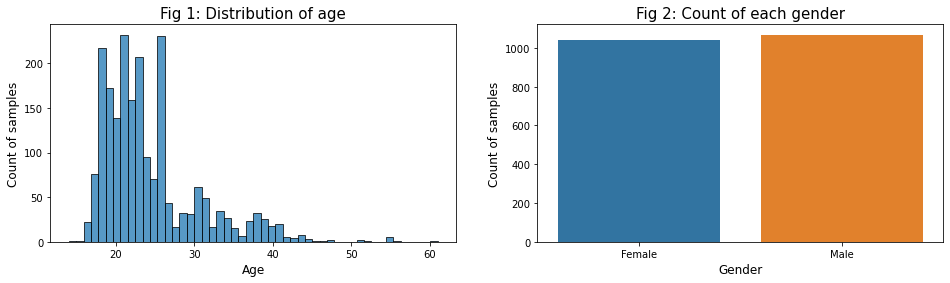

In [6]:
#Visualize data
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.histplot(df.Age)
plt.title('Fig 1: Distribution of age', size = 15)
plt.xlabel('Age', size = 12)
plt.ylabel('Count of samples', size = 12)

plt.subplot(1,2,2)
sns.countplot(df['Gender'])
plt.title('Fig 2: Count of each gender', size = 15)
plt.xlabel('Gender', size = 12)
plt.ylabel('Count of samples', size = 12)

Text(0, 0.5, 'Count of samples')

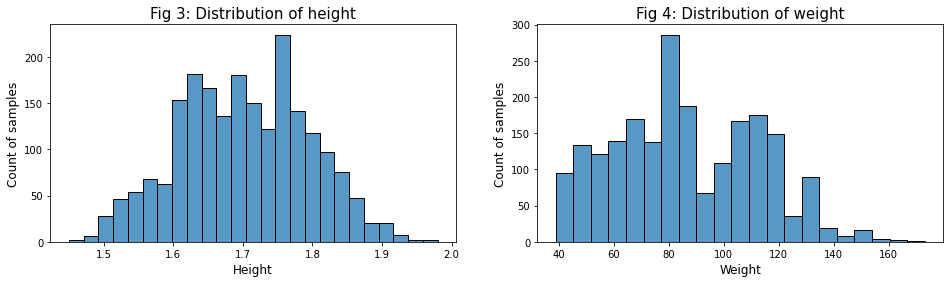

In [7]:
#Visualize data
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.histplot(df.Height)
plt.title('Fig 3: Distribution of height', size = 15)
plt.xlabel('Height', size = 12)
plt.ylabel('Count of samples', size = 12)

plt.subplot(1,2,2)
sns.histplot(df.Weight)
plt.title('Fig 4: Distribution of weight', size = 15)
plt.xlabel('Weight', size = 12)
plt.ylabel('Count of samples', size = 12)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

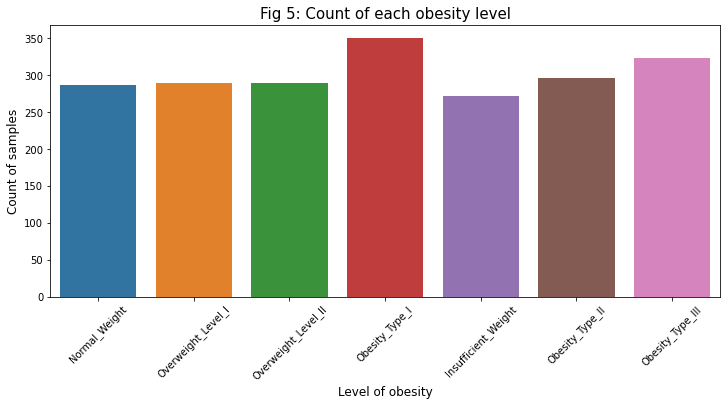

In [8]:
plt.figure(figsize = (12,5))
sns.countplot(df['NObeyesdad'])
plt.title('Fig 5: Count of each obesity level', size = 15)
plt.xlabel('Level of obesity', size = 12)
plt.ylabel('Count of samples', size = 12)
plt.xticks(rotation=45)

The data obtained mainly from people in early twentieth (Fig.1). This data is balanced with nearly 1000 samples obtained for each gender (Fig.2). As can be seen from Fig.3 and Fig.4, the height and the weight have the most samples is around 1.75m and 80 kg. There is no outlier found in height or weight. The Fig.5 shows that the data is quite balanced in obesity type, making this data usefull for predict obesity status based on other attributes. There are total 2111 samples without any missing value. Therefore, this data set is ready for using.

In [9]:
# Convert categorical variables to numerical variables
df_enc = OrdinalEncoder()
df["Gender_c"] = df_enc.fit_transform(df[["Gender"]])
df["History_c"] = df_enc.fit_transform(df[["family_history_with_overweight"]])
df["FAVC_c"] = df_enc.fit_transform(df[["FAVC"]])
df["CAEC_c"] = df_enc.fit_transform(df[["CAEC"]])
df["SMOKE_c"] = df_enc.fit_transform(df[["SMOKE"]])
df["SCC_c"] = df_enc.fit_transform(df[["SCC"]])
df["CALC_c"] = df_enc.fit_transform(df[["CALC"]])
df["MTRANS_c"] = df_enc.fit_transform(df[["MTRANS"]])
df["NObeyesdad_c"] = df_enc.fit_transform(df[["NObeyesdad"]])
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,NObeyesdad,Gender_c,History_c,FAVC_c,CAEC_c,SMOKE_c,SCC_c,CALC_c,MTRANS_c,NObeyesdad_c
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Normal_Weight,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Overweight_Level_I,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Overweight_Level_II,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,...,Normal_Weight,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,...,Normal_Weight,0.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,...,Normal_Weight,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,...,Normal_Weight,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,...,Normal_Weight,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,1.0


In [10]:
# Prepare data frame with usefull columns
df=df.drop(['family_history_with_overweight', 'FAVC', 'SCC', 'FCVC','CAEC','CALC', 'MTRANS', 'NObeyesdad', 'Gender','SMOKE'], axis=1)
df.head(10)

,Age,Height,Weight,NCP,CH2O,FAF,TUE,Gender_c,History_c,FAVC_c,CAEC_c,SMOKE_c,SCC_c,CALC_c,MTRANS_c,NObeyesdad_c
0,21.0,1.62,64.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,23.0,1.80,77.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,27.0,1.80,87.0,3.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,22.0,1.78,89.8,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
5,29.0,1.62,53.0,3.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0
6,23.0,1.50,55.0,3.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0
7,22.0,1.64,53.0,3.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0
8,24.0,1.78,64.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0
9,22.0,1.72,68.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,1.0


In [11]:
df.corr()

,Age,Height,Weight,NCP,CH2O,FAF,TUE,Gender_c,History_c,FAVC_c,CAEC_c,SMOKE_c,SCC_c,CALC_c,MTRANS_c,NObeyesdad_c
Age,1.000000,-0.025958,0.202560,-0.043944,-0.045304,-0.144938,-0.296931,0.048394,0.205725,0.063902,0.083739,0.091987,-0.116283,-0.044487,-0.601945,0.236170
Height,-0.025958,1.000000,0.463136,0.243672,0.213376,0.294709,0.051912,0.618466,0.247684,0.178364,0.048818,0.055499,-0.133753,-0.129732,-0.073609,0.038986
Weight,0.202560,0.463136,1.000000,0.107469,0.200575,-0.051436,-0.071561,0.161668,0.496820,0.272300,0.287493,0.025746,-0.201906,-0.206677,0.004610,0.387643
NCP,-0.043944,0.243672,0.107469,1.000000,0.057088,0.129504,0.036326,0.067600,0.071370,-0.007000,-0.097801,0.007811,-0.015624,-0.071747,-0.053858,-0.092616
CH2O,-0.045304,0.213376,0.200575,0.057088,1.000000,0.167236,0.011965,0.107930,0.147437,0.009719,0.144995,-0.031995,0.008036,-0.091386,0.044028,0.108868
FAF,-0.144938,0.294709,-0.051436,0.129504,0.167236,1.000000,0.058562,0.189607,-0.056673,-0.107995,-0.030110,0.011216,0.074221,0.086799,0.006394,-0.129564
TUE,-0.296931,0.051912,-0.071561,0.036326,0.011965,0.058562,1.000000,0.017269,0.022943,0.068417,-0.048567,0.017613,-0.010928,0.045864,0.176945,-0.069448
Gender_c,0.048394,0.618466,0.161668,0.067600,0.107930,0.189607,0.017269,1.000000,0.102512,0.064934,0.091543,0.044698,-0.102633,0.007616,-0.137537,0.024908
History_c,0.205725,0.247684,0.496820,0.071370,0.147437,-0.056673,0.022943,0.102512,1.000000,0.208036,0.169787,0.017385,-0.185422,0.036676,-0.101540,0.313667
FAVC_c,0.063902,0.178364,0.272300,-0.007000,0.009719,-0.107995,0.068417,0.064934,0.208036,1.000000,0.150068,-0.050660,-0.190658,-0.089520,-0.069800,0.044582


Based on results above, the most correlated features with obesity level (attributes NObeyesdad_c) are weight, CAEC (Consumption of food between meal and History_c (family history with overweight). Absolute value of coefficient value with NObeyesdad_c is closer to 1 shows that the feature has stronger linear relationship with NObeyesdad_c. However, the correlation is quite small, less than 0.5 so I did not use linear regression to analysis.

In [12]:
df.describe

<bound method NDFrame.describe of             Age    Height      Weight  NCP      CH2O       FAF       TUE  \
0     21.000000  1.620000   64.000000  3.0  2.000000  0.000000  1.000000   
1     21.000000  1.520000   56.000000  3.0  3.000000  3.000000  0.000000   
2     23.000000  1.800000   77.000000  3.0  2.000000  2.000000  1.000000   
3     27.000000  1.800000   87.000000  3.0  2.000000  2.000000  0.000000   
4     22.000000  1.780000   89.800000  1.0  2.000000  0.000000  0.000000   
...         ...       ...         ...  ...       ...       ...       ...   
2106  20.976842  1.710730  131.408528  3.0  1.728139  1.676269  0.906247   
2107  21.982942  1.748584  133.742943  3.0  2.005130  1.341390  0.599270   
2108  22.524036  1.752206  133.689352  3.0  2.054193  1.414209  0.646288   
2109  24.361936  1.739450  133.346641  3.0  2.852339  1.139107  0.586035   
2110  23.664709  1.738836  133.472641  3.0  2.863513  1.026452  0.714137   

      Gender_c  History_c  FAVC_c  CAEC_c  SMOKE_c  S

### 3. Analysis techniques

#### 3.1 Logistic Regression

In [13]:
# Split data into training(80%) and testing data (20%)
train, test = train_test_split(df, test_size=0.2, random_state=200)
print(train.shape)
print(test.shape)

(1688, 16)
(423, 16)


In [14]:
# Determine X,y for training and testing data
X_train = train.drop(['NObeyesdad_c'], axis=1)
y_train = train['NObeyesdad_c']
X_test = test.drop(['NObeyesdad_c'], axis=1)
y_test = test['NObeyesdad_c']

In [15]:
X_train

,Age,Height,Weight,NCP,CH2O,FAF,TUE,Gender_c,History_c,FAVC_c,CAEC_c,SMOKE_c,SCC_c,CALC_c,MTRANS_c
716,17.203917,1.853325,59.619485,3.595761,2.000000,2.077653,0.714701,1.0,1.0,1.0,2.0,0.0,0.0,3.0,0.0
492,45.000000,1.700000,86.000000,3.000000,1.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0
1709,20.156664,1.620109,103.393354,1.240424,1.413218,0.165269,0.862587,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0
2053,21.232659,1.719913,131.567481,3.000000,1.651462,1.655993,0.939982,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
1655,40.106145,1.760175,117.651046,2.976211,1.726109,0.477855,0.000000,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,30.361365,1.758530,111.635463,3.219347,1.981782,0.482625,0.000000,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0
1860,25.291974,1.684768,104.821175,3.000000,1.444379,0.224482,0.912187,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
784,16.941489,1.551288,54.932420,1.296156,2.000000,0.110174,1.944675,0.0,0.0,1.0,2.0,0.0,1.0,2.0,3.0
617,20.406066,1.868931,63.199726,3.699594,2.825629,1.699592,0.071028,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0


Text(0, 0.5, 'Count of samples')

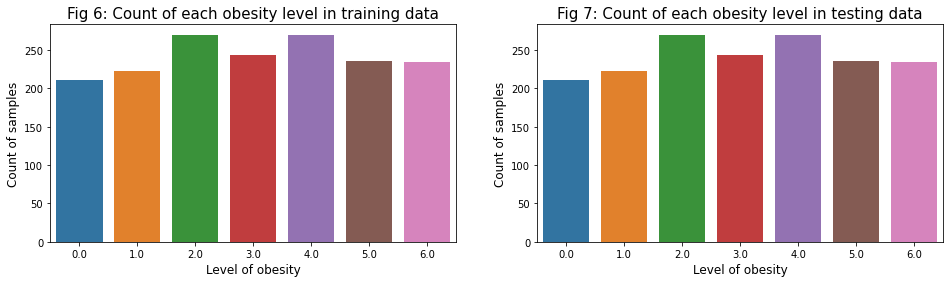

In [16]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title('Fig 6: Count of each obesity level in training data', size = 15)
plt.xlabel('Level of obesity', size = 12)
plt.ylabel('Count of samples', size = 12)

plt.subplot(1,2,2)
sns.countplot(y_train)
plt.title('Fig 7: Count of each obesity level in testing data', size = 15)
plt.xlabel('Level of obesity', size = 12)
plt.ylabel('Count of samples', size = 12)


Training and testing data set is balanced in level of obesity and appropriate for further analysis.

In [17]:
# Estimate accuracy score on test set using RFE
acc_scores = []
for i in range(1,15):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Accuracy score on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Accuracy score on test set using 1 features:  0.20803782505910165
Accuracy score on test set using 2 features:  0.26713947990543735
Accuracy score on test set using 3 features:  0.29314420803782504
Accuracy score on test set using 4 features:  0.36879432624113473
Accuracy score on test set using 5 features:  0.4066193853427896
Accuracy score on test set using 6 features:  0.3664302600472813
Accuracy score on test set using 7 features:  0.42789598108747046
Accuracy score on test set using 8 features:  0.4515366430260047
Accuracy score on test set using 9 features:  0.4326241134751773
Accuracy score on test set using 10 features:  0.4397163120567376
Accuracy score on test set using 11 features:  0.4940898345153664
Accuracy score on test set using 12 features:  0.6501182033096927
Accuracy score on test set using 13 features:  0.640661938534279
Accuracy score on test set using 14 features:  0.6643026004728132


Accuracy score using 14 features have the highest accuracy score. To determine which features should be drop, I perform below steps:

In [18]:
# Create RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=14, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=14)

In [19]:
# Do evaluation on test set
y_test_hat = rfe.predict(X_test)
print("Accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

Accuracy score on test set:  0.6643026004728132


In [20]:
# Summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000


In [21]:
X_train

,Age,Height,Weight,NCP,CH2O,FAF,TUE,Gender_c,History_c,FAVC_c,CAEC_c,SMOKE_c,SCC_c,CALC_c,MTRANS_c
716,17.203917,1.853325,59.619485,3.595761,2.000000,2.077653,0.714701,1.0,1.0,1.0,2.0,0.0,0.0,3.0,0.0
492,45.000000,1.700000,86.000000,3.000000,1.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0
1709,20.156664,1.620109,103.393354,1.240424,1.413218,0.165269,0.862587,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0
2053,21.232659,1.719913,131.567481,3.000000,1.651462,1.655993,0.939982,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
1655,40.106145,1.760175,117.651046,2.976211,1.726109,0.477855,0.000000,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,30.361365,1.758530,111.635463,3.219347,1.981782,0.482625,0.000000,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0
1860,25.291974,1.684768,104.821175,3.000000,1.444379,0.224482,0.912187,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
784,16.941489,1.551288,54.932420,1.296156,2.000000,0.110174,1.944675,0.0,0.0,1.0,2.0,0.0,1.0,2.0,3.0
617,20.406066,1.868931,63.199726,3.699594,2.825629,1.699592,0.071028,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0


From the result above, column SMOKE_c should be drop out.

In [22]:
# Determine features for training and testing data
X_train_lr = X_train.drop(['SMOKE_c'], axis=1)
X_test_lr = X_test.drop(['SMOKE_c'], axis=1)

In [23]:
# Build Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_lr, y_train)
# Do predictions
y_pred_lr = lr.predict(X_test_lr)

In [24]:
# Evaluate the performance of trained logistic regression model
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print('The accuracy of test data: ',accuracy_lr)

The accuracy of test data:  0.6643026004728132


In [25]:
scores_lr = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10)
print('Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores_lr.min(), scores_lr.max(), scores_lr.mean(), scores_lr.std()))

Classifier accuracy range: [0.6095, 0.7101]; mean: 0.6606; std: 0.0266



In [26]:
print('The MSE :',mean_squared_error(y_test, y_pred_lr))
print('The square root of MSE :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('The MAE :',mean_absolute_error(y_test, y_pred_lr))
print('The R squared :',r2_score(y_test, y_pred_lr))

The MSE : 3.359338061465721
The square root of MSE : 1.8328497105506827
The MAE : 0.9290780141843972
The R squared : 0.1347588887289477


#### 3.2 KNN

In [27]:
# Create and train a KNN classifier model with k=5
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# Use the model to predict testing data and evaluate performance
y_pred_knn = clf.predict(X_test)
accuracy = accuracy_score(y_pred_knn, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.851063829787234


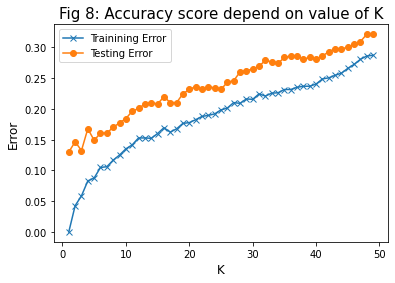

In [29]:
# Plot the accuracy trend
training_error=list()
testing_error=list()

for i in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 50), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 50), testing_error, marker='o', label='Testing Error')
plt.title('Fig 8: Accuracy score depend on value of K', size =15)
plt.xlabel('K',size = 12)
plt.ylabel('Error',size = 12)
plt.legend(loc='best')
plt.show()

In [30]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 50)}

In [31]:
# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy')

In [32]:
# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  1
The accuracy:  0.9004578754578756


In [33]:
# Create and train a KNN classifier model with k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
# Use the model to predict testing data
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print('Testing accuracy is: ', accuracy_knn)

Testing accuracy is:  0.8699763593380615


In [35]:
scores_knn = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
print('Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores_knn.min(), scores_knn.max(), scores_knn.mean(), scores_knn.std()))

Classifier accuracy range: [0.8750, 0.9290]; mean: 0.9005; std: 0.0143



#### 3.3 Gaussian Naives Bayes

In [36]:
# Create and training a Gaussian Naive Bayes classifier model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Use the model to predict testing data
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_pred_gnb, y_test)
print('Testing accuracy is: %.4f\n' % accuracy_gnb)

Testing accuracy is: 0.5816



In [37]:
scores_gnb = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=10)
print('Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores_gnb.min(), scores_gnb.max(), scores_gnb.mean(), scores_gnb.std()))

Classifier accuracy range: [0.5030, 0.6154]; mean: 0.5699; std: 0.0339



#### 3.4 Multinomial NB

In [38]:
# Create and training a Multinomial Naive Bayes classifier model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
# Evaluate the model
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print('Accuracy is: %.4f\n' % accuracy_mnb)

Accuracy is: 0.5863



In [39]:
scores_mnb = cross_val_score(mnb, X_train, y_train, scoring='accuracy', cv=10)
print('Classifier accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores_mnb.min(), scores_mnb.max(), scores_mnb.mean(), scores_mnb.std()))

Classifier accuracy range: [0.5266, 0.6391]; mean: 0.5978; std: 0.0350



#### 4. Analysis summarize

Text(0.5, 1.0, 'Fig 10: Mean scores of four models')

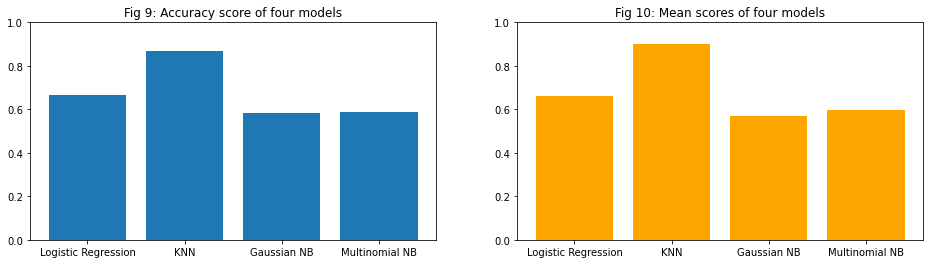

In [40]:
# Visualize the results
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.bar(['Logistic Regression', 'KNN', 'Gaussian NB', 'Multinomial NB'],[accuracy_lr,accuracy_knn,accuracy_gnb,accuracy_mnb])
plt.ylim(0, 1)
plt.title('Fig 9: Accuracy score of four models', size = 12)

plt.subplot(1,2,2)
plt.bar(['Logistic Regression', 'KNN', 'Gaussian NB', 'Multinomial NB'],[scores_lr.mean(),scores_knn.mean(),scores_gnb.mean(),scores_mnb.mean()], 
color='orange')
plt.ylim(0, 1)
plt.title('Fig 10: Mean scores of four models', size = 12)

As can be seen from Fig. 9 and Fig.10, all the methods have high accuracy score, being higher than 50%. KNN performance is slightly better than other models. In contrast, Multinomial NB and Gaussion NB are the least efficient models. 
Multinomial NB is used when data is discrete while Gaussian NB is appropriate with continuous data. However, the data obtained is included both discrete and continuous data. Discrete data such as family history of overweigh, frequency of vegetable or high calories food and so on. Some examples of continous data is weight, height. Therefore, Multinomial NB and Gaussian NB performances are nearly the same and the accuracy score is not high, around 0.6